<a href="https://colab.research.google.com/github/justinjunge/Convergent-Wisdom-Project/blob/main/Holy_Texts_Word_Cloud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Convergent Wisdom! So far, we've seen samples of how natural language processing and sentiment analysis can be used to generate word clouds of stories written by ChatGPT and of entire Wikipedia articles. In this module, we will apply these previously introduced methods to the study of three prominent religious texts (the Hindu Bhagavad Gita, the Muslim Qur'an, and the Christian Bible) and see how word clouds can be used to conduct highly unique linguistic, philosophical, and psychological analyses.




This first code block initializes necessary libraries and imports the religious texts.

In [5]:
import pandas as pd
import requests
from io import StringIO

github_csv_url_Gita = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/CSV_files/Gita.csv'
response1 = requests.get(github_csv_url_Gita)
if response1.status_code == 200:
  dfG = pd.read_csv(StringIO(response1.text))
else:
  print('Failed to fetch CSV File from Github')

github_csv_url_Quran = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/CSV_files/Quran.csv'
response2 = requests.get(github_csv_url_Quran)
if response2.status_code == 200:
  dfQ = pd.read_csv(StringIO(response2.text))
else:
  print('Failed to fetch CSV File from Github')

#github_csv_url_Bible = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/CSV_files/ChristianBible.csv'
#response3 = requests.get(github_csv_url_Bible)
#if response3.status_code == 200:
 # dfB = pd.read_csv(StringIO(response3.text))
#else:
 # print('Failed to fetch CSV File from Github')

import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Gita (Hinduism) Word Cloud Analysis

The Srimad Bhagavad Gita ("The Holy Song of God") is one of many revered scriptures within Hinduism. It is a 700-verse discourse between Arjuna, a famed archer, and Krishna, one of ten earthly manifestations (*avataras*) of the Hindu god Vishnu. The Gita takes place within the context of a larger scripture known as the Mahabharata, a sprawling epic centered on a family at war. Arjuna is reluctant to wage war on members of his own family even if it is the most righteous action in his situation to do so, and the Gita's discourse centers around Krishna convincing Arjuna that he must fight. Together, the Gita and the Mahabharata contain many thematic elements that form the backbone of Hindu mythology. Other prominent Hindu religious texts include the Vedas, the Upanishads, the Puranas, and the Ramayana.

This first word cloud depicts the frequency of all words within the Gita.

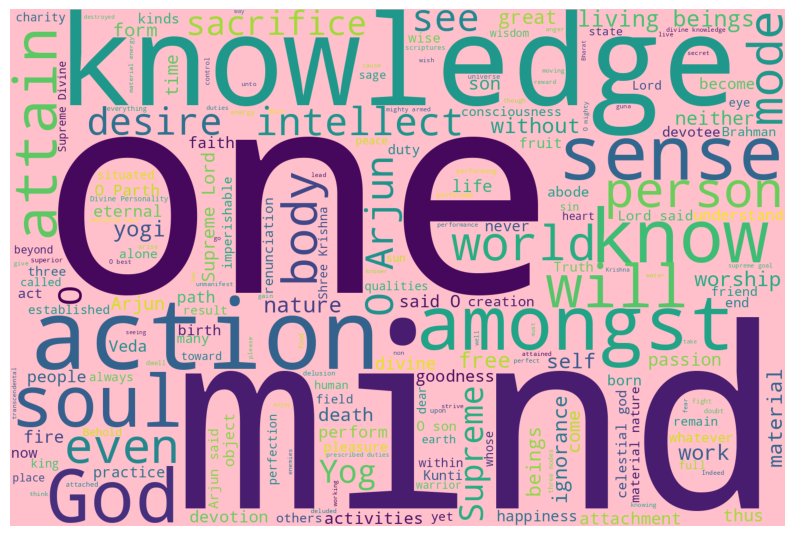

In [6]:
gwholedf = dfG.Text
# set([t.parent.name for t in t])

output = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in gwholedf:
        output += '{} '.format(line)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output)
plot_cloud(wordcloud)

As expected, the most common word in the Gita is *Arjuna*, one of the two speakers in the discourse. Another prominent word is *action*, as much of the Gita (especially the first six chapters) discusses the nature of action, duty, righteousness, attachment, detachment, consequence, and materialism. One popular lesson from the Gita is that one should always perform their prescribed duties but should learn how to remain detached from desiring the fruits of their actions (2.47). Other words that stand out include knowledge, desire, body, mind, insight, world, yoga, and Brahman (the idea that Divinity is a transcendental entity that permeates the whole Universe such that Divinity is all that exists and all that exists is Divinity).

Next, we will apply sentiment analysis tools to the word cloud generator. The word cloud below depicts the frequency of all positive words within the Gita.

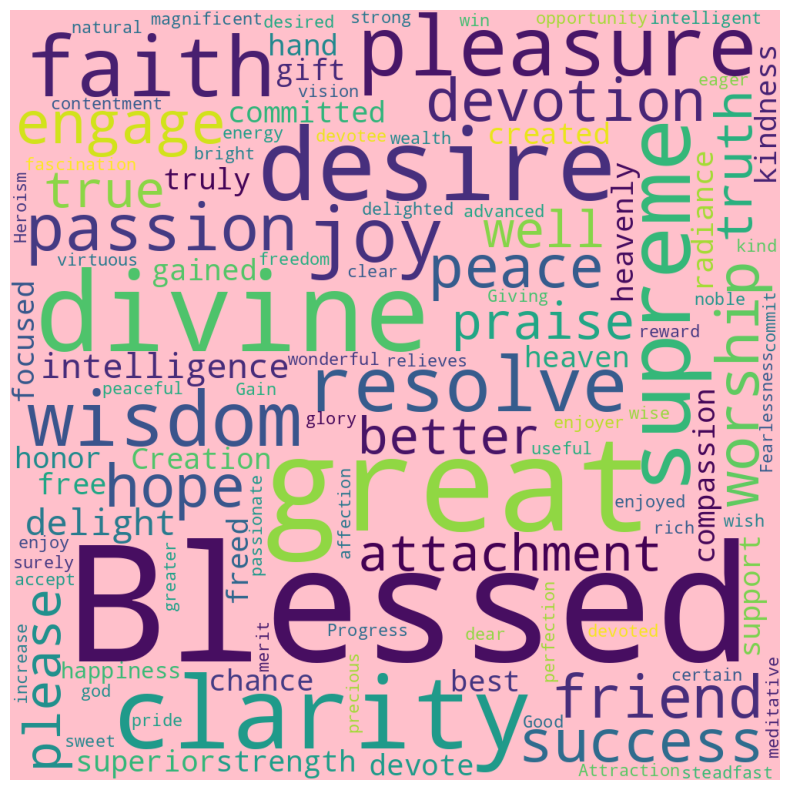

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listg = []
neu_word_listg = []
neg_word_listg = []

wordGita = dfG.Text
wordGita = wordGita.to_string()

for word in wordGita.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listg.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listg.append(word)
    else:
        neu_word_listg.append(word)

gposdf = pd.DataFrame (pos_word_listg, columns = ['words'])

output4 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in gposdf.words:
        output4 += '{} '.format(line)

def plot_cloud(wordcloud4):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud4)
    plt.axis("off");
wordcloud4 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output4)
plot_cloud(wordcloud4)

Many interesting observations can be made above. The largest word is the word *Blessed,* which likely refers to this Gita version’s translation of the Sanskrit phrase *sri bhagavan uvaca*. This phrase roughly means “God said” or “Krishna said” but it is translated here as “The Blessed One said” in reference to Krishna. This term is used every time the speaker changes to Krishna. There are other instances of the word *blessed* in other contexts within the text, but this is the primary one for this specific translation. Several emotion-related words pop out as well, such as *hope, happiness, joy, fearlessness, resolve, faith, peace, wisdom, virtuous, honor, compassion, intelligence, kindness,* and *strength*. The words *desire* and *attachment* are likely so large due to the Gita’s focus on detaching from one’s worldly desires in order to attain spiritual immortality, one of the major focuses of the *karma yoga* section (chapters 1-6). For similar thematic reasons, the word *friend* may be large due to the Gita’s theme of learning to recognize God as an entity that could become one’s friend. The words *passion* and *clarity* refer to two of three modes of action (*gunas*) originally proposed by the Sankhya school of Hindu philosophy. The mode of acting in passion is called *rajas*, the mode of acting in goodness/clarity is called *sattva*, and the mode of acting in turpor/dark inertia is called *tamas*.These more complex philosophical elements of Hinduism are discussed in the latter third of the Gita (chapters 13 - 18).

The word cloud belows depicts the frequency of all negative words within the Gita.

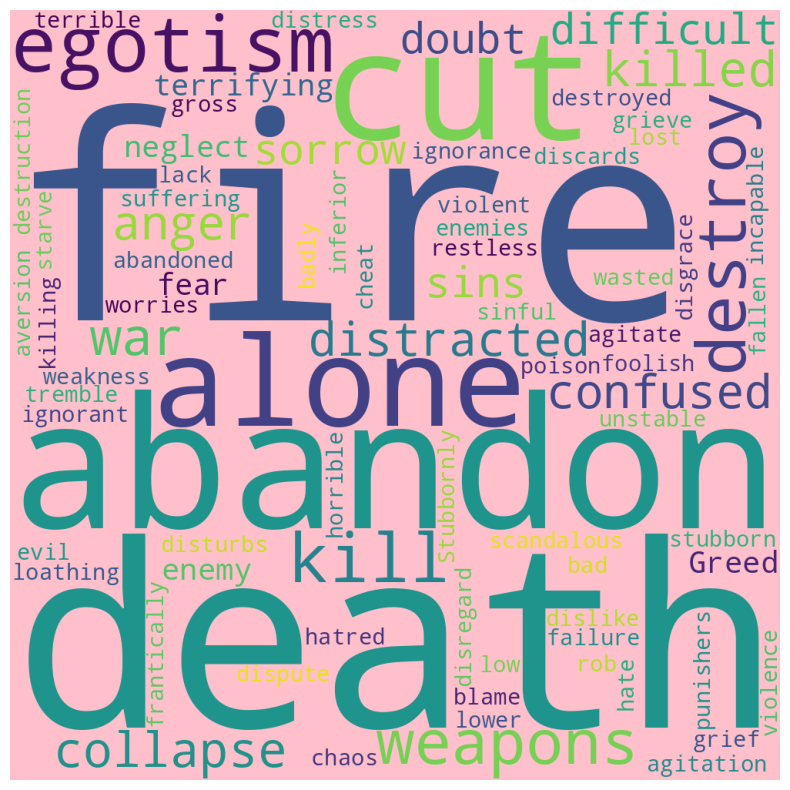

In [ ]:
nposdf = pd.DataFrame (neg_word_listg, columns = ['words'])

output5 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in nposdf.words:
        output5 += '{} '.format(line)

def plot_cloud(wordcloud5):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud5)
    plt.axis("off");
wordcloud5 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output5)
plot_cloud(wordcloud5)

*Fire* is the largest word in the cloud and takes on many meanings within the Gita and within Hinduism at large. In the Gita, *fire* is used in reference to desire, the senses, the mode of passion, or in reference of how the "fire of knowledge" can be purifying. *Fire* is also used to describe Krishna's true Godly form, which he reveals to Arjuna in Chapter 11. Other cases describe the religious connotations of *fire*, which is seen as the messenger of God within Hinduism. No Hindu prayer is complete without the presence of a flame, fire, or lamp of some sort, whether it be a daily prayer, a prayer on a holiday such as Diwali (the "Festival of Lights"), a wedding ceremony, a funeral ceremony, or a sacrificial fire into which offerings are made. It is important to recognize each word within the context of its religion, as the term *fire* in the Gita does not refer to a hellfire as it may in other religious texts. Other words of interest include death, abandoned, alone, egotism, anger, greed, chaos, sorrow, enemy, doubt, confused, distracted, grief, and war. Enemy, war, confused, and distracted may refer to Arjuna's reluctance to fight in the battle. The senses are also referred to as an enemy, as experience of the senses leads to desire and attachment.

The word cloud belows depicts the frequency of all neutral words within the Gita.

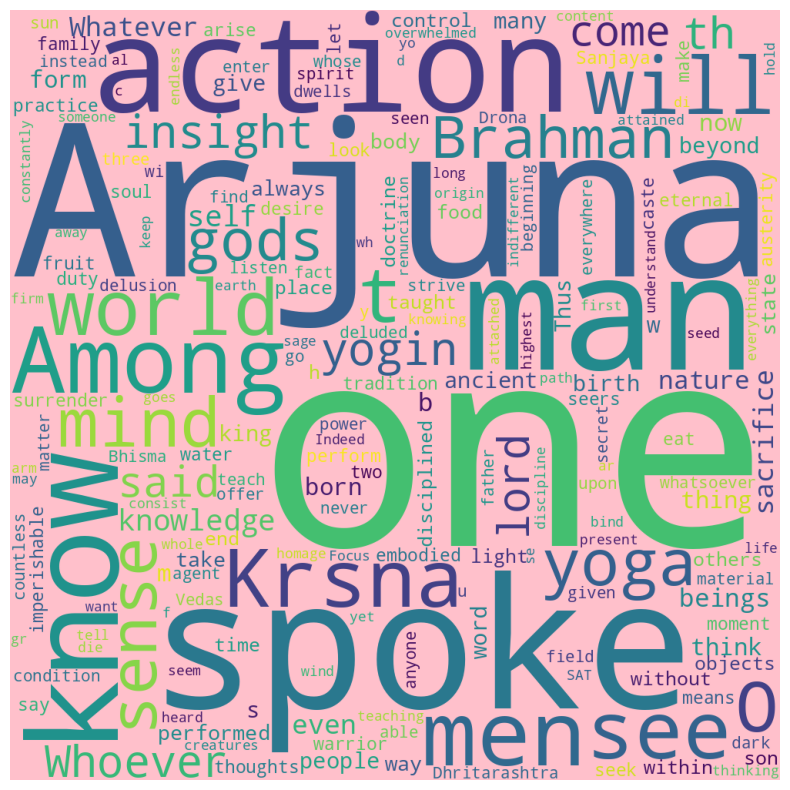

In [ ]:
neuposdf = pd.DataFrame (neu_word_listg, columns = ['words'])

output10 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in neuposdf.words:
        output10 += '{} '.format(line)

def plot_cloud(wordcloud10):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud10)
    plt.axis("off");
wordcloud10 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output10)
plot_cloud(wordcloud10)

The largest word here is clearly *Arjuna*, which is unsurprising yet also intriguing. While the name *Arjuna* itself does not carry inherent emotinoality, the name would likely elicit some positive reaction when read, heard, or seen by a Hindu person. It is also intriguing that *Krsna* (Krishna) and *gods* are ascribed neutrality as well.

Now that we've taken a birds'-eye view of the text, let's delve one level of granularity deeper. The tool below allows for the generation of positive emotional word clouds for any chapter of the Bhagavad Gita's 18 chapters. Chapter 11, where Krishna reveals his true Godly form to Arjuna, is shown as a representation. Feel free to change the number in the brackets in "wordGita = Gita[number]" to get the positive emotional word cloud for any chapter you would like to see. Note that an input of 0 corresponds to the first chapter, an inpout of 1 corresonds to the second chapter, and so on and so forth. Try it out!

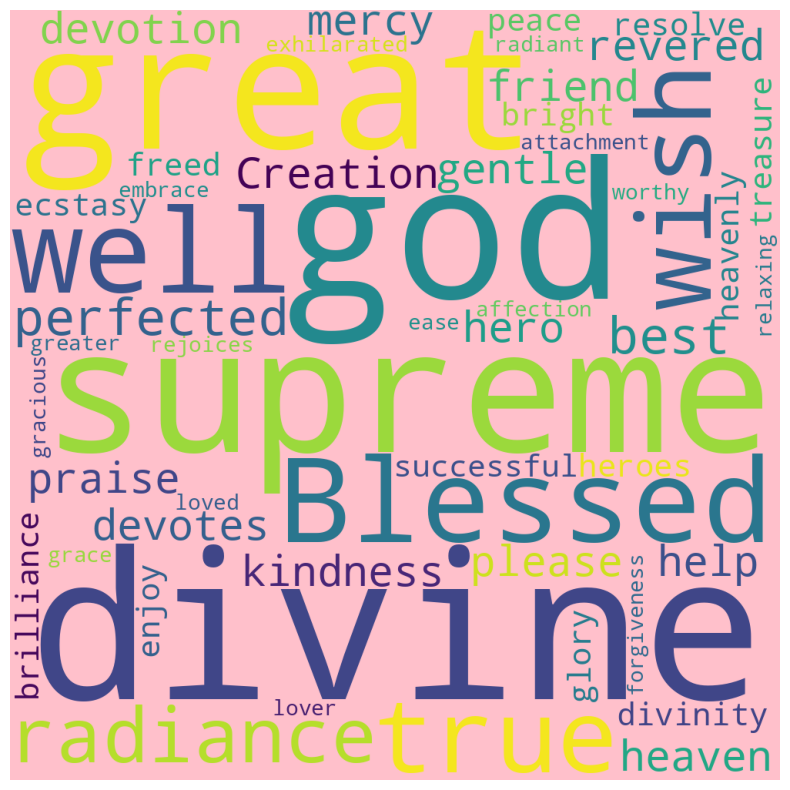

In [ ]:
Gita1 = dfG[dfG['Chapter']==2]

num_chapters = dfG['Chapter'].max()
Gita = [''] * num_chapters

for i in range(num_chapters):
  Gita[i] = dfG[dfG['Chapter']==i+1]

sid = SentimentIntensityAnalyzer()
pos_word_listg=[]
neu_word_listg=[]
neg_word_listg=[]

wordGita = Gita[10]
wordGita = wordGita.to_string()

for word in wordGita.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listg.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listg.append(word)
    else:
        neu_word_listg.append(word)

gposdf = pd.DataFrame (pos_word_listg, columns = ['words'])

output13 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in gposdf.words:
        output13 += '{} '.format(line)

def plot_cloud(wordcloud13):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud13)
    plt.axis("off");
wordcloud13 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output13)
plot_cloud(wordcloud13)

The tool below allows for the generation of negative emotional word clouds for any chapter of the Bhagavad Gita's 18 chapters. Chapter 11, where Krishna reveals his true Godly form to Arjuna, is shown as a representation. Feel free to change the number in the brackets in "wordGita = Gita[number]" to get the negative emotional word cloud for any chapter you would like to see. Note that an input of 0 corresponds to the first chapter, an input of 1 corresponds to the second chapter, and so on and so forth. Try it out!

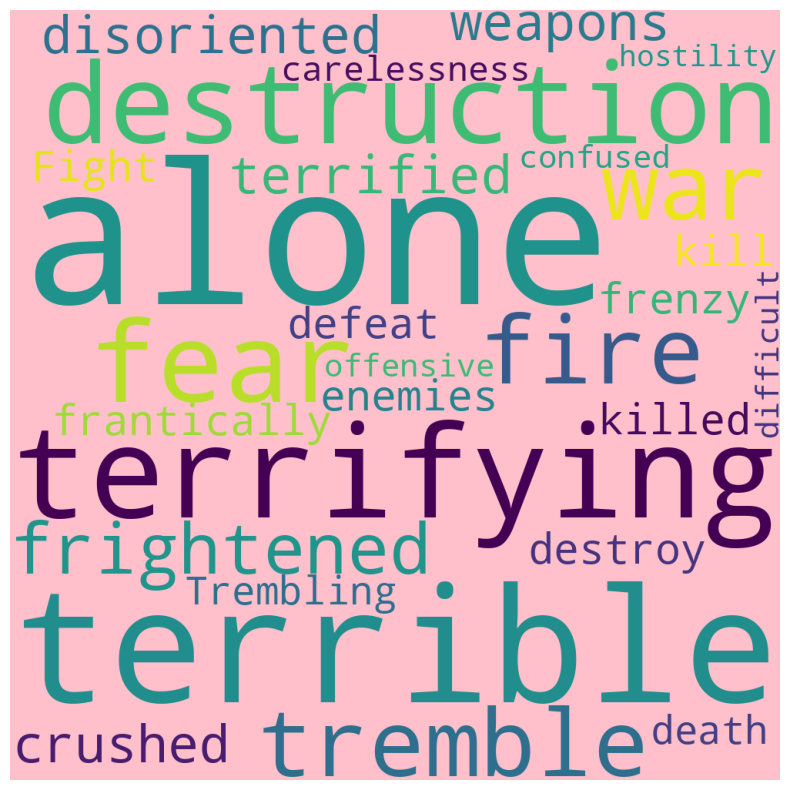

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listg=[]
neu_word_listg=[]
neg_word_listg=[]

wordGita = Gita[10]
wordGita = wordGita.to_string()

for word in wordGita.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listg.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listg.append(word)
    else:
        neu_word_listg.append(word)

gnegdf = pd.DataFrame (neg_word_listg, columns = ['words'])

output14 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in gnegdf.words:
        output14 += '{} '.format(line)

def plot_cloud(wordcloud14):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud14)
    plt.axis("off");
wordcloud14 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output14)
plot_cloud(wordcloud14)

Tools for creating neutral word clouds for each chapter or birds'-eye views (non-emotional) for each chapter were not created for the purposes of this analysis. However, these tools can easily be created if desired by modifying existing portions of the previous code. For the neutral word clouds, simply access the neu_word_list for the appropriate text and generate the word cloud from there. For the birds'-eye view, you can generate a word cloud by including the code that indexes each text by chapter or book and by excluding the SentimentIntensityAnalyzer code.

# Qur'an (Islam) Word Cloud Analysis

The Qur'an is the central religious text of Islam, revered by Muslims worldwide as the unadulterated word of God (Allah) revealed to the Prophet Muhammad (peace be upon him) via the archangel Gabriel (Jibril). The Qur'an contains over 6200 verses spread out over 114 chapters, totaling 600 pages. The Prophet received the revelations periodically through his life, starting from the first one he received at the age of 40 while he was meditating in the cave of Hira on a mountain near Mecca, Saudi Arabia. The Qur'an, combined with various compilations of the sayings of the Prophet (known as hadith), comprises the textual basis of Islam.  

This first word cloud depicts the frequency of all words within the Qur'an.

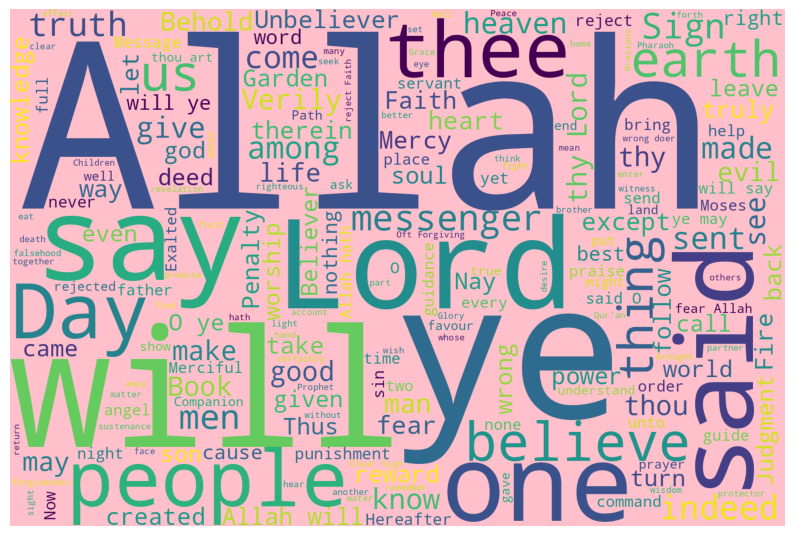

In [ ]:
qwholedf = dfQ.Text
# set([t.parent.name for t in t])

output2 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qwholedf:
        output2 += '{} '.format(line)

def plot_cloud(wordcloud2):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud2)
    plt.axis("off");
wordcloud2 = WordCloud(width = 1500, height = 1000, background_color='pink').generate(output2)
plot_cloud(wordcloud2)


The most frequent word in the Qur’an is “Allah,” which makes complete sense. In the Qur’an, Allah is dictating his revelations to Muhammad (peace be upon him) via the angel Gabriel. Allah frequently refers to himself with his own name throughout the text. Allah is the Arabic word for God, and it refers to the same entity that Christians and Jews refer to as “God” or “Yahweh” in the Bible and Torah. It is a common misconception that Muslims consider Allah to be their own god separate from God in Judeo-Christian traditions. Other words that stand out include *believe*, *truth*, *mercy*, *people*, *Day* (referring to the Muslim belief in a Day of Judgment), *will*, and *Sign*.

Next, we will apply sentiment analysis tools to the word cloud generator. The word cloud below depicts the frequency of all positive words within the Qur'an.

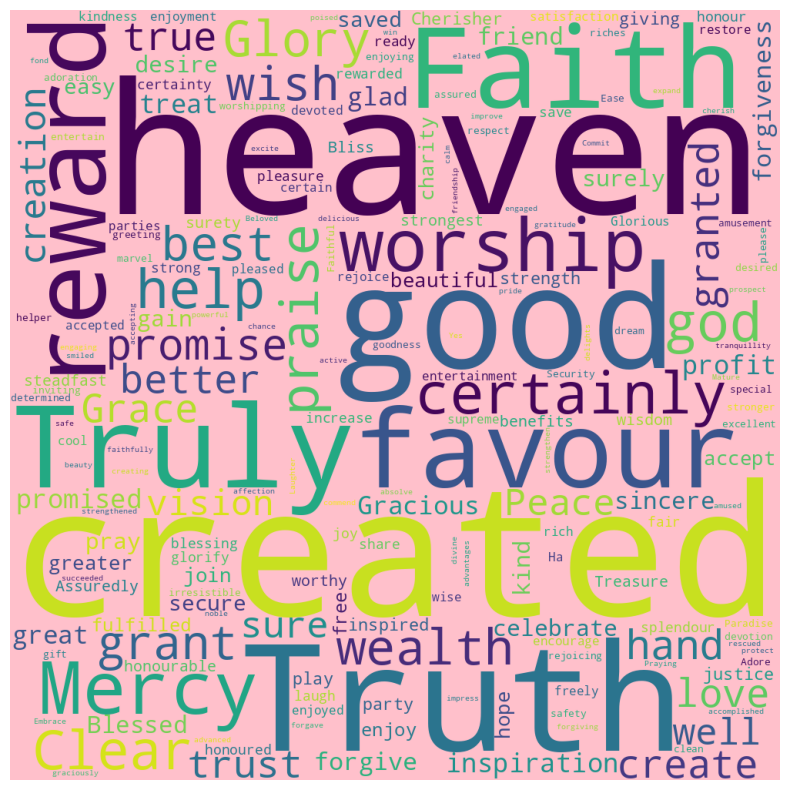

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listq=[]
neu_word_listq=[]
neg_word_listq=[]

wordQuran = dfQ.Text
wordQuran = wordQuran.to_string()

for word in wordQuran.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listq.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listq.append(word)
    else:
        neu_word_listq.append(word)

qposdf = pd.DataFrame (pos_word_listq, columns = ['words'])

output6 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qposdf.words:
        output6 += '{} '.format(line)

def plot_cloud(wordcloud6):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud6)
    plt.axis("off");
wordcloud6 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output6)
plot_cloud(wordcloud6)

The most frequent positive word is *created*. The creative powers of Allah are extolled numerous times in the Qur'an, including but not limited to themes of His creation of the heavens and the earth (nearly every chapter), the creation of humanity (verses 16.4, 22.5, 23.13-15, and countless others), the immaculacy of this creation (67.3-4), the creation of everything in pairs (man, woman, husband, wife, day, night, joy, sorrow, heat, cold, etc. – see 31.10, 36.36, 42.11, 43.12, 50.7, 78.8, and numerous others), and more. The word *heaven* is also quite large, as is *truth*. The Qur’an, the Day of Judgment, Creation, and even Allah himself are all referred to in different locations as “the truth.” Also large is *truly*, sometimes translated as verily, surely, or indeed. This term comes up in a variety of verses, but most notably in those that attempt to relieve or mitigate pain or difficulty (13.28, 94:5-8, others). *Favour/favor* highlights a major theme in the Qur’an, that creation, humanity, goodness, knowledge, prophetic revelation, and all things in general come from the mercy and favor that Allah has granted to humanity. The word god (lowercase) refers to portions of the Qur'an that deny the existence of polytheistic gods and affirm Allah as the one God. *Desire* is interesting to note, as the Gita and the Qur’an both criticize those who follow only their worldly desires. Other emotional or value-related words include justice, forgiveness, gracious, peace, love, faith, trust, sincere, hope, charity, wisdom, promise, mercy, forgive, grace, inspiration, and help.

The word cloud below depicts the frequency of all negative words within the Qur'an.

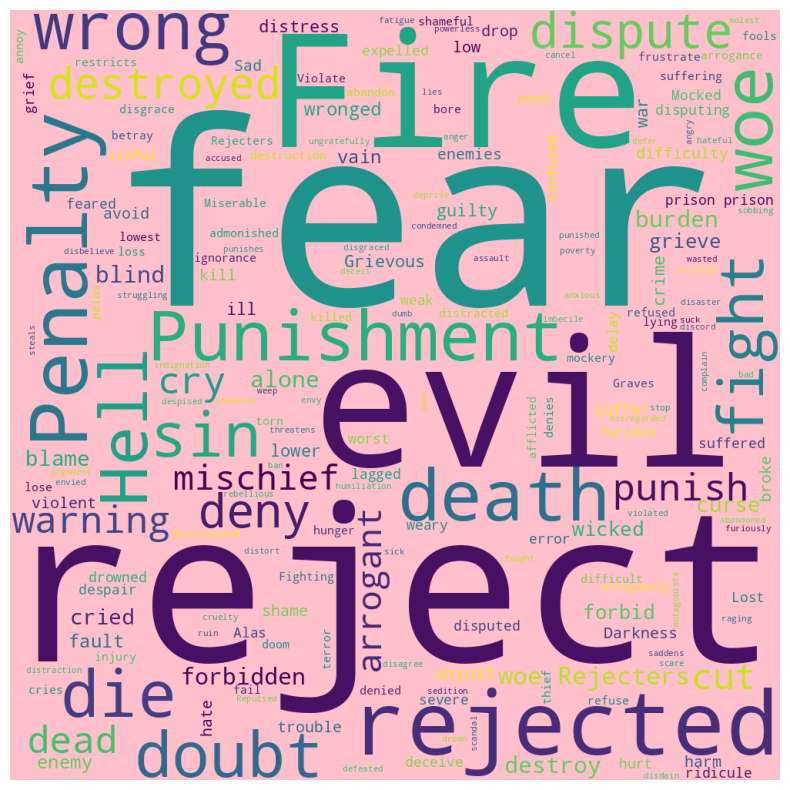

In [ ]:
qnegdf = pd.DataFrame (neg_word_listq, columns = ['words'])

output7 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qnegdf.words:
        output7 += '{} '.format(line)

def plot_cloud(wordcloud7):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud7)
    plt.axis("off");
wordcloud7 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output7)
plot_cloud(wordcloud7)

*Fear* is the largest word, followed by *reject*. As with the discussion on *fire* in the Gita, it is important to unpack what *fear* means here. The phrase “fear Allah” is common in the Qur’an in a variety of contexts, though mostly in contexts of fearing punishments rather than in contexts describing Allah as a fearsome figure. The first is in a way that doesn’t necessarily denote the emotion of fear as much as it denotes the idea of cognizance. Similar to Hinduism’s belief in *brahman*, Islam asks Muslims to practice *taqwa*, a form of God consciousness or awareness of the presence of God in which the believer is always mindful of God when acting. Though it certainly depends on the perception of the individual, this kind of fear appears less like fear of something scary. The act of taqwa, though, can also be seen as beautiful or awe-inspiring, reminding and comforting the believer that God is
always present and in control of all affairs. The second source of fear in the Qur’an is the threats of punishment in Hell that await those who disbelieve, again a fear of punishment given so that people begin to believe in God and do good deeds. *Fire* and *penalty* are thus accordingly large. But again the word fear is also present in contexts that negate it, such as when the Qur’an describes how believers and those who do good have nothing to fear for they are destined to receive Mercy from their Lord (40.2-3). As for the word reject, this is a similar idea to denying Allah’s favors in that it refers to rejecting Allah’s signs (41.12, 41.39, 41.53, and more). Other words of interest include penalty, punishment, death (shared by the Gita), evil, doubt, woe, fight, dispute, Hell, destroy, drown, warning, severe, sin, mischief, cry, and curse.

The word cloud belows depicts the frequency of all neutral words within the Qur'an.

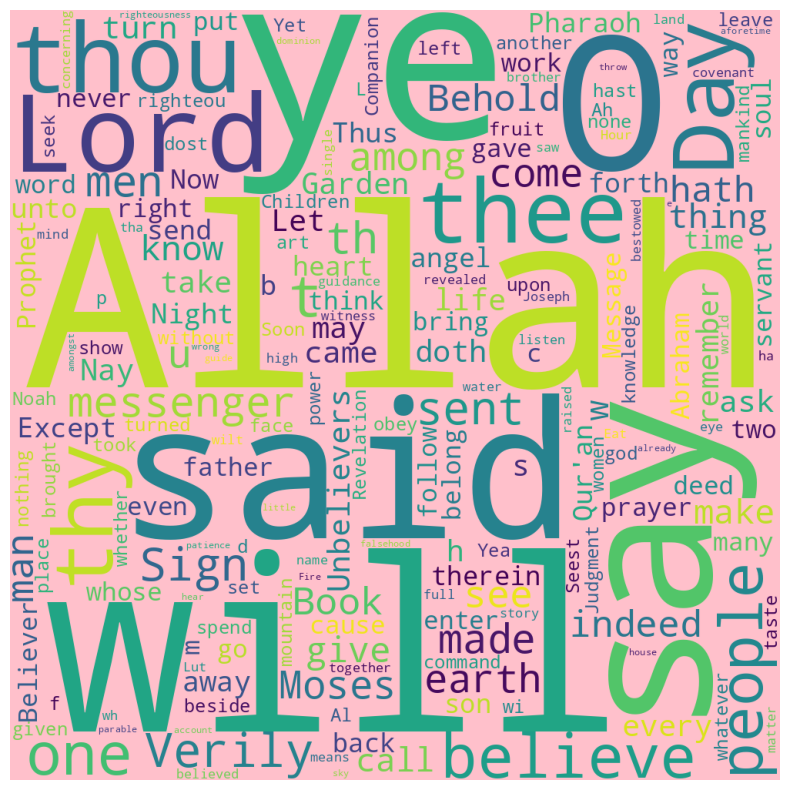

In [ ]:
qneudf = pd.DataFrame (neu_word_listq, columns = ['words'])

output11 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qneudf.words:
        output11 += '{} '.format(line)

def plot_cloud(wordcloud11):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud11)
    plt.axis("off");
wordcloud11 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output11)
plot_cloud(wordcloud11)

*Allah* is seen as neutral, the same way that Krishna was seen as neutral for the Gita. These are both different than the result for the Bible, where God was seen as positive. The word *Qur’an* is also seen as neutral, and we also see *sign* as neutral alongside *messenger*. *Believe* is also neutral. We also see that *verily* here is neutral while its synonym *truly* is seen as positive, though both are used interchangeably in similar contexts. While Day is seen as neutral here it is actually both negative and positive in the Islamic context of the Day of Judgment, a day that will be negative for disbelievers because they will enter Hell but a day that will be positive for the believers because they will enter Paradise (see 41.30).

Now that we've taken a birds'-eye view of the text, let's delve one level of granularity deeper. The tool below allows for the generation of positive emotional word clouds for any chapter of the Quran's 114 chapters. Chapter 2 (Surah Al-Baqarah), the longest chapter of the Qur'an, is shown as a representation. Feel free to change the number in the brackets in "wordQuran = Quran[number]" to get the positive emotional word cloud for any chapter you would like to see. Note that an input of 0 corresponds to the first chapter. Try it out!

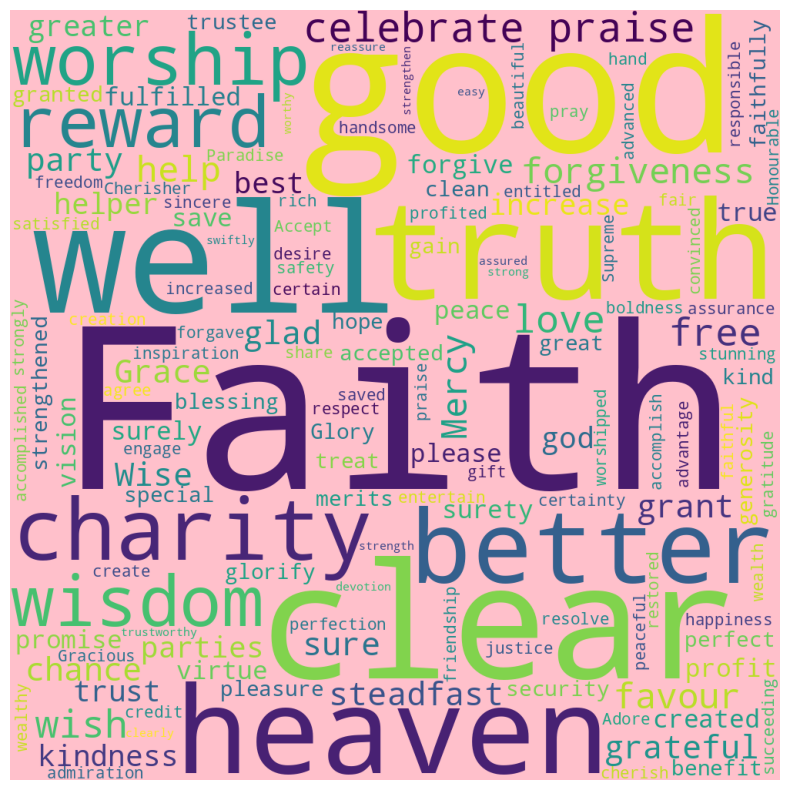

In [ ]:
Quran1 = dfQ[dfQ['Surah']==2]

num_chapters2 = dfQ['Surah'].max()
Quran = [''] * num_chapters2

for i in range(num_chapters2):
  Quran[i] = dfQ[dfQ['Surah']==i+1]

sid = SentimentIntensityAnalyzer()
pos_word_listq=[]
neu_word_listq=[]
neg_word_listq=[]

wordQuran = Quran[1]
wordQuran = wordQuran.to_string()

for word in wordQuran.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listq.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listq.append(word)
    else:
        neu_word_listq.append(word)

qposdf = pd.DataFrame (pos_word_listq, columns = ['words'])

output15 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qposdf.words:
        output15 += '{} '.format(line)

def plot_cloud(wordcloud15):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud15)
    plt.axis("off");
wordcloud15 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output15)
plot_cloud(wordcloud15)

The tool below allows for the generation of negative emotional word clouds for any chapter of the Quran's 114 chapters. Chapter 2 (Surah Al-Baqarah), the longest chapter of the Qur'an, is shown as a representation. Feel free to change the number in the brackets in "wordQuran = Quran[number]" to get the negative emotional word cloud for any chapter you would like to see. Note that an input of 0 corresponds to the first chapter. Try it out!

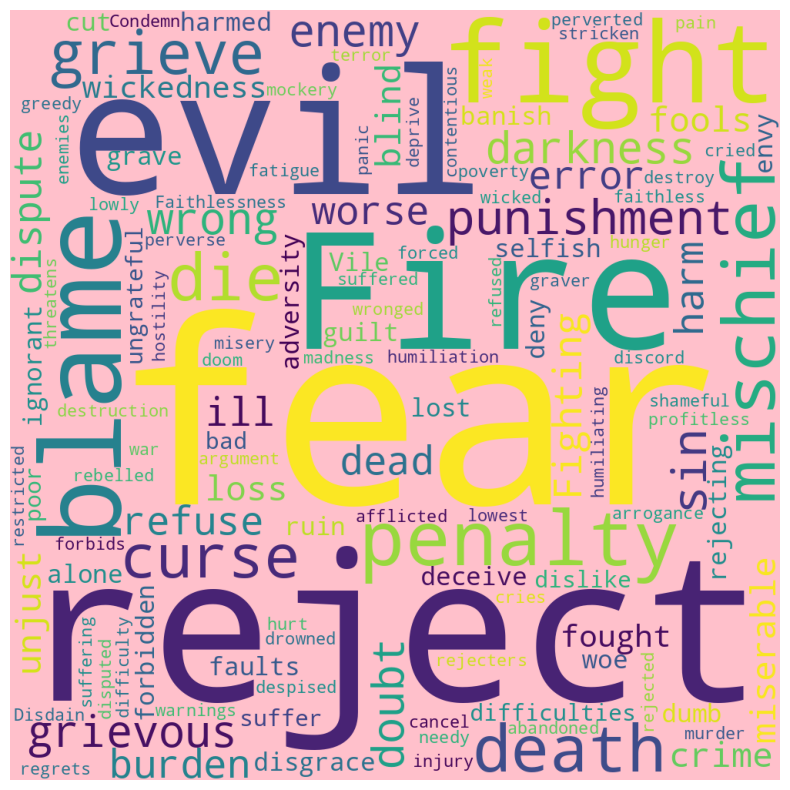

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listq=[]
neu_word_listq=[]
neg_word_listq=[]

wordQuran = Quran[1]
wordQuran = wordQuran.to_string()

for word in wordQuran.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listq.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listq.append(word)
    else:
        neu_word_listq.append(word)

qnegdf = pd.DataFrame (neg_word_listq, columns = ['words'])

output16 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in qnegdf.words:
        output16 += '{} '.format(line)

def plot_cloud(wordcloud16):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud16)
    plt.axis("off");
wordcloud16 = WordCloud(width = 1000, height = 1000, background_color='pink',collocations=False).generate(output16)
plot_cloud(wordcloud16)

Tools for creating neutral word clouds for each chapter or birds'-eye views (non-emotional) for each chapter were not created for the purposes of this analysis. However, these tools can easily be created if desired by modifying existing portions of the previous code. For the neutral word clouds, simply access the neu_word_list for the appropriate text and generate the word cloud from there. For the birds'-eye view, you can generate a word cloud by including the code that indexes each text by chapter or book and by excluding the SentimentIntensityAnalyzer code.

# Bible (Christianity) Word Cloud Analysis

The Bible is the central religious text of Christianity and one of the most well-known and widely distributed scriptures in human history. Unlike the Gita and the Qur'an (whose lessons are divided into chapters and verses), the Bible is divided into 66 books that are further subdivided into two main sections: the Old Testament (before the arrival of Jesus Christ) and the New Testament (the life of Jesus Christ). The first five books of the Bible comrpise the Torah, a sacred scripture in Judaism. The Bible has been translated into hundreds of different languages and versions. The version used here is the King James Version (KJV).

The first word cloud depicts the frequency of all words in the Bible.

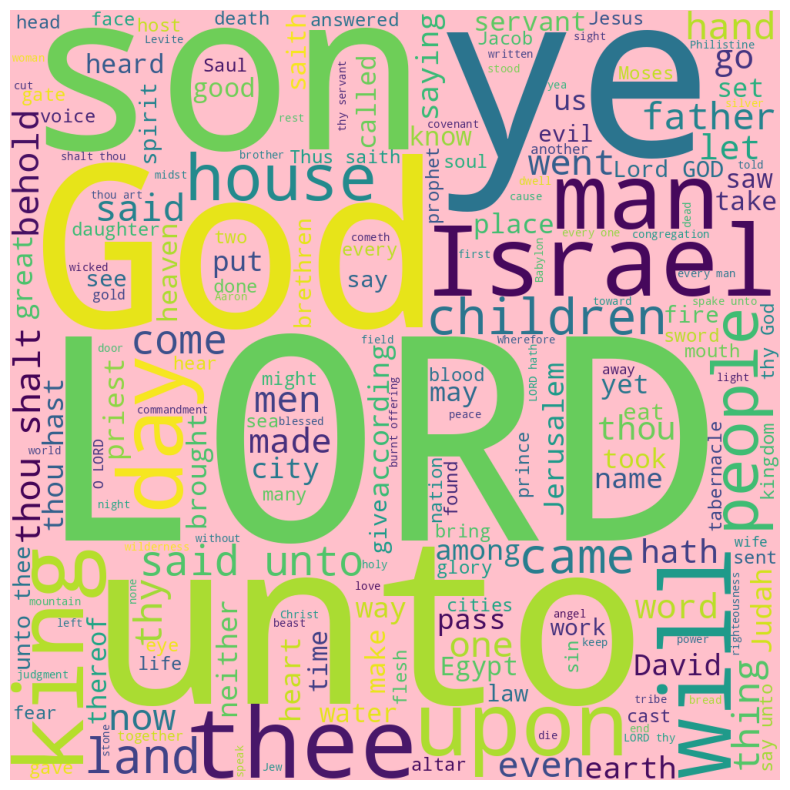

In [ ]:
bwholedf = dfB.text
# set([t.parent.name for t in t])

output3 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bwholedf:
        output3 += '{} '.format(line)

def plot_cloud(wordcloud3):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud3)
    plt.axis("off");
wordcloud3 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output3)
plot_cloud(wordcloud3)

It makes sense why in the Bible the words “Lord” and “God” (which essentially mean the same thing) would be so large. Other words of interest are *son*, *Israel*, *king*, *house*, *hand*, *will*, *people*, *man*, *behold*, and *children*.

Next, we will apply sentiment analysis tools to the word cloud generator. The word cloud below depicts the frequency of all positive words within the Bible.

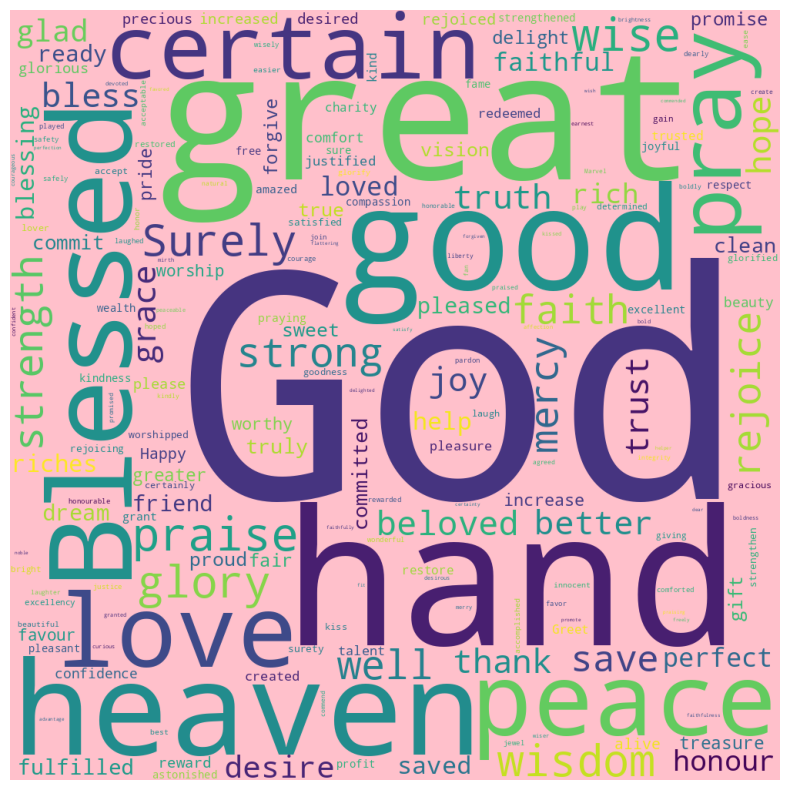

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listb=[]
neu_word_listb=[]
neg_word_listb=[]

wordBible = dfB.text
wordBible = wordBible.to_string()

for word in wordBible.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listb.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listb.append(word)
    else:
        neu_word_listb.append(word)

bposdf = pd.DataFrame (pos_word_listb, columns = ['words'])

output8 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bposdf.words:
        output8 += '{} '.format(line)

def plot_cloud(wordcloud8):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud8)
    plt.axis("off");
wordcloud8 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output8)
plot_cloud(wordcloud8)

Other than the difference that *God* occupies a space in the positive word cloud for the Bible rather than a neutral word cloud, this figure above is pretty similar to the positivity word cloud for the Qur’an. We see words like heaven, good, faith, glory, surely (perhaps a variant of *truly* or *verily*), and mercy. This is in line with the fact that both Christianity and Islam are Abrahamic faiths, and also in line with how Muslims believe that the Bible is yet another scripture of the same God that sent down the Qur’an. The Bible even has a few words in common with the Gita, such as *peace* and *wisdom*. The words *blessed* and *desire/desires* are shared by all three texts. Unique to the Bible most obviously seem to be *hand* and *pray*, while the word *love* conspicuously occupies a larger space than it does in either the Qur’an or Gita. Other emotional or value-related words include honor, grace, bless, rejoice, praise, strength, forgive, help, happy, proud, and peace.

The word cloud belows depicts the frequency of all negative words within the Bible.

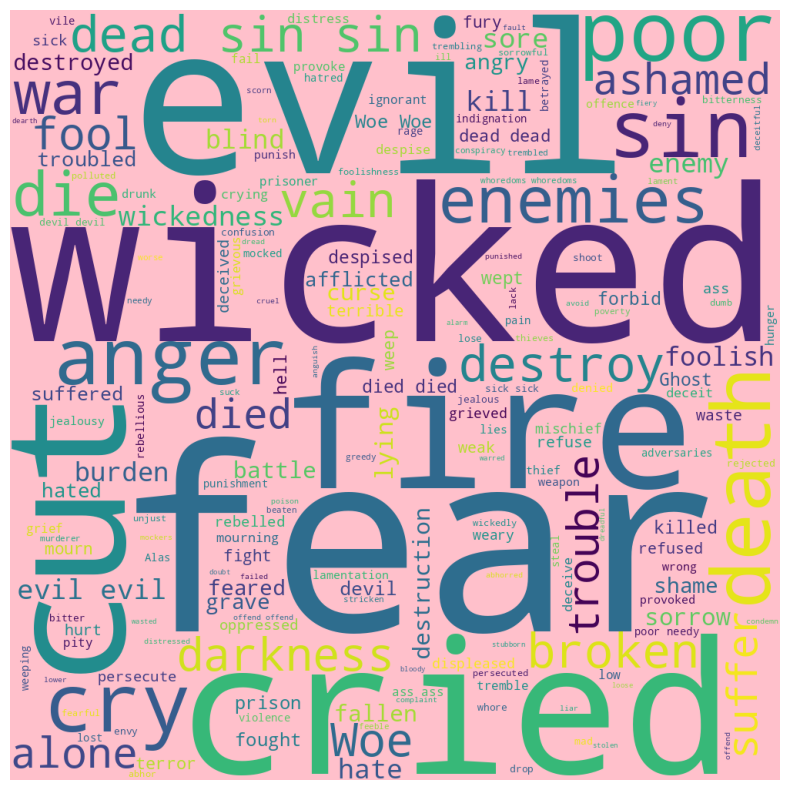

In [ ]:
bnegdf = pd.DataFrame (neg_word_listb, columns = ['words'])

output9 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bnegdf.words:
        output9 += '{} '.format(line)

def plot_cloud(wordcloud9):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud9)
    plt.axis("off");
wordcloud9 = WordCloud(width = 1000, height = 1000, background_color='pink').generate(output9)
plot_cloud(wordcloud9)

Like the Qur’an, we see that the most frequent negative word in the Bible is *fear*, followed by *wicked*, *evil*, *cried*, and *fire* (shared with the Gita). *Death*, *sin*, and *poor* are also noticeably large. In terms of the word *fear*, the reasons for its use in the Bible are actually quite similar to the reasons for its use in the Qur’an. Firstly, it is used in the sense of needing to fear God and his punishment of Hell as a way to deter humans from sin. Biblical stories recount the destruction of sinning nations (see Genesis 18 and 19 for one example in the tales of Sodom and Gomorrah), just as the Qur’an also does (see Thamud and Aad). Additionally, the strong presence of themes of salvation throughout the Bible encourage Christians to overcome their worldly fears by trusting in the ultimate plan of God. This dual nature of God as both powerful in a good way and powerful in a fear-inducing
way is also present in places where the word *fire* appears. There is also, of course, the threat of burning in hell or in the Lake of Fire. *Fire* is also used in some Biblical stories, such as when the Holy Spirit appears as the Tongues of Fire to help Jesus’ disciples spread the Word of God (Acts 2).
Other emotional or value-related words include pity, weep, curse, grief, fool, distress, darkness, anger, cry, burden, suffer, hate, woe, deceit, fury, shame, weary, alone, and envy.

The word cloud belows depicts the frequency of all neutral words within the Bible.

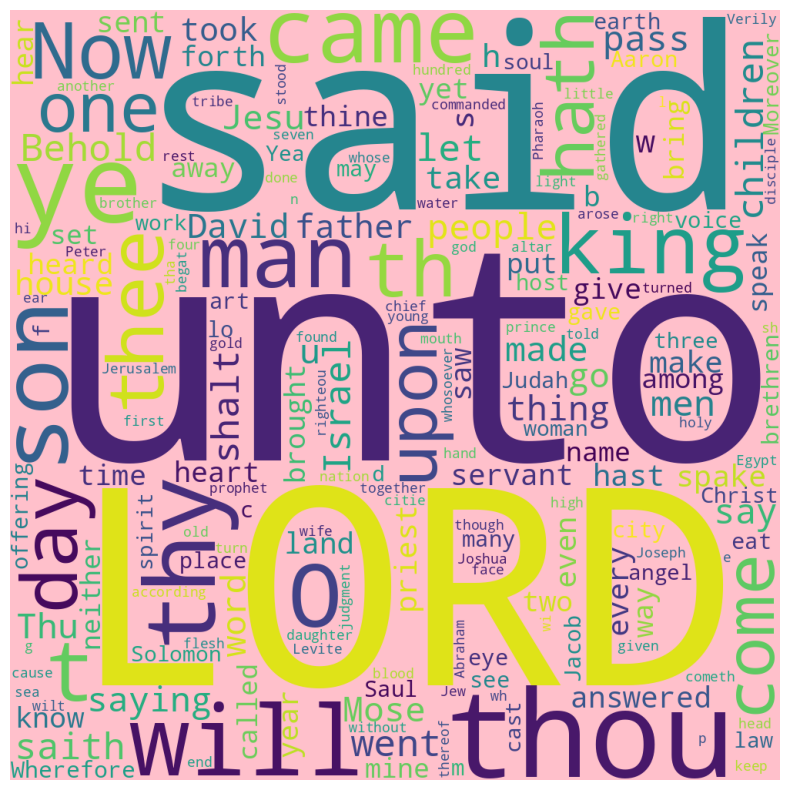

In [ ]:
bneudf = pd.DataFrame (neu_word_listb, columns = ['words'])

output12 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bneudf.words:
        output12 += '{} '.format(line)

def plot_cloud(wordcloud12):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud12)
    plt.axis("off");
wordcloud12 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output12)
plot_cloud(wordcloud12)

The words *day* and *will* are shared by the Qur’an. Few, if any, emotion-related or value related words are visible. It is interesting to note the absence of the name Jesus in any of the Biblical figures thus far.

Now that we've taken a birds'-eye view of the text, let's delve one level of granularity deeper. The tool below allows for the generation of positive emotional word clouds for any book of the Bible's 66 books. Book 1 (Genesis) is shown as a representation. Feel free to change the number in the brackets in "wordBible = Bible[number]" to get the positive emotional word cloud for any book you would like to see. Note that an input of 0 corresponds to the first book. Try it out!

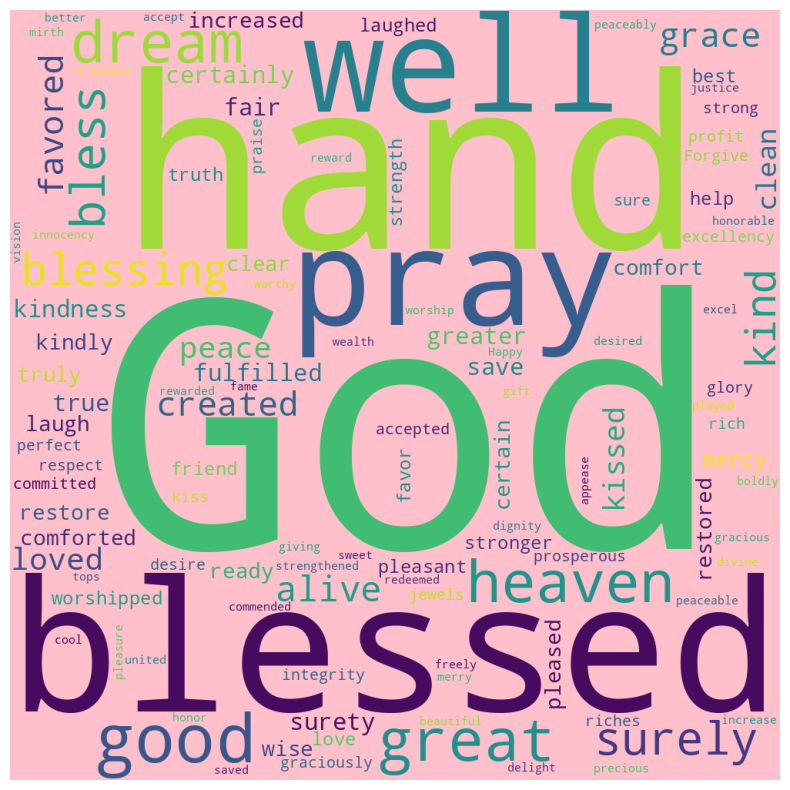

In [ ]:
num_books = dfB['book'].max()
Bible = [''] * num_books
for i in range(num_books):
  Bible[i] = dfB[dfB['book']==i+1]

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

wordBible = Bible[0]
wordBible = wordBible.to_string()

for word in wordBible.split():
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

bposdf = pd.DataFrame (pos_word_list, columns = ['words'])

output17 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bposdf.words:
        output17 += '{} '.format(line)

def plot_cloud(wordcloud17):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud17)
    plt.axis("off");
wordcloud17 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output17)
plot_cloud(wordcloud17)

The tool below allows for the generation of negative emotional word clouds for any book of the Bible's 66 books. Book 1 (Genesis) is shown as a representation. Feel free to change the number in the brackets in "wordBible = Bible[number]" to get the negative emotional word cloud for any book you would like to see. Note that an input of 0 corresponds to the first book. Try it out!

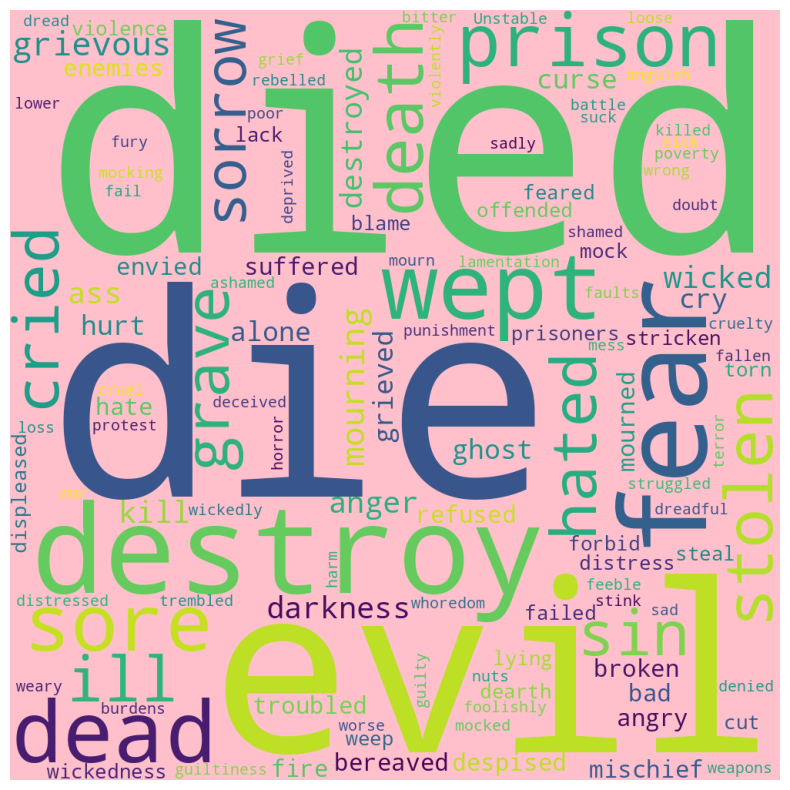

In [ ]:
sid = SentimentIntensityAnalyzer()
pos_word_listb=[]
neu_word_listb=[]
neg_word_listb=[]

wordBible = Bible[0]
wordBible = wordBible.to_string()

for word in wordBible.split():
    # word = word.strip(".,:;?!")
    if (sid.polarity_scores(word)['compound']) >= 0.25:
        pos_word_listb.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.25:
        neg_word_listb.append(word)
    else:
        neu_word_listb.append(word)

bnegdf = pd.DataFrame (neg_word_listb, columns = ['words'])

output18 = ''
# excludelist = [
# 'label', 'h4', 'ol', '[document]', 'a', 'h1', 'noscript', 'span', 'header', 'ul', 'html', 'section', 'article', 'em', 'meta', 'title', 'body', 'aside', 'footer', 'div', 'form', 'nav', 'p', 'head', 'link', 'strong', 'h6', 'br', 'li', 'h3',
# 'h5', 'input', 'blockquote', 'main', 'script', 'figure',
    # there may be more elements you don't want, such as "style", etc.
# ]

for line in bnegdf.words:
        # output18 is a space-separated string of all words in bnegdf.words
        output18 += '{} '.format(line)

def plot_cloud(wordcloud18):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud18)
    plt.axis("off");
wordcloud18 = WordCloud(width = 1000, height = 1000, background_color='pink', collocations=False).generate(output18)
plot_cloud(wordcloud18)

Tools for creating neutral word clouds for each chapter or birds'-eye views (non-emotional) for each chapter were not created for the purposes of this analysis. However, these tools can easily be created if desired by modifying existing portions of the previous code. For the neutral word clouds, simply access the neu_word_list for the appropriate text and generate the word cloud from there. For the birds'-eye view, you can generate a word cloud by including the code that indexes each text by chapter or book and by excluding the SentimentIntensityAnalyzer code.

# Remarks

The application of natural language processing, sentiment analysis, and word cloud generation methodologies to the study of emotional religious psychology yields profound insights and opens countless new doors for discovery. In just one short notebook, our tools read through thousands of pages of sacred religious scripture and generated emotional data about them in seconds. When these data are paired with data from the lived experience of different religious practitioners, it becomes possible to see how life experiences and religious texts can both influence each others' emotional canvas. It also becomes possible to see how the world's great religions converge and diverge in their wisdom on human psychology.

While this cutting-edge interdisciplinary work is truly groundbreaking, the sheer potential for future researchers to catapult these methods to even greater heights is all the more exciting. The authors of this project can't wait to see how the global community of human scholars further expands on our initial ideas.

Have you checked out our other modules yet? See the Sentiment Analysis and Heatmaps modules for even more exciting possibilities.